In [32]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [33]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [34]:
NUM_CLASSES = 18

IMAGE_SIZE = 120

DATASET_PATH = "../data/pokemon_per_type_nemlc"

In [35]:
# Creating the model

DROPOUT = 0.2

model=Sequential()

model.add(Dense(4, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(DROPOUT))


model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(DROPOUT))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(DROPOUT))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(DROPOUT))

model.add(Flatten())
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(DROPOUT))


model.add(Dense(NUM_CLASSES, activation = 'sigmoid'))


In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 120, 120, 4)       16        
                                                                 
 conv2d_11 (Conv2D)          (None, 118, 118, 32)      1184      
                                                                 
 batch_normalization_8 (Batc  (None, 118, 118, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 59, 59, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 57, 57, 64)       

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [38]:

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   rotation_range = 20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 16

training_set = train_datagen.flow_from_directory(DATASET_PATH + '/train', 
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
                                                    batch_size = batch_size)
test_set = test_datagen.flow_from_directory(DATASET_PATH + '/val',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = batch_size)

Found 1089 images belonging to 18 classes.
Found 125 images belonging to 18 classes.


In [39]:
nb_epochs = 500
fitted_model = model.fit(training_set,
                        epochs = nb_epochs,
                        validation_data = test_set)

Epoch 1/500
69/69 [==============================] - 4s 48ms/step - loss: 0.5053 - accuracy: 0.0781 - val_loss: 0.3582 - val_accuracy: 0.1200
Epoch 2/500
69/69 [==============================] - 3s 44ms/step - loss: 0.2375 - accuracy: 0.1074 - val_loss: 0.7654 - val_accuracy: 0.0560
Epoch 3/500
69/69 [==============================] - 3s 42ms/step - loss: 0.2200 - accuracy: 0.1341 - val_loss: 0.9943 - val_accuracy: 0.0560
Epoch 4/500
69/69 [==============================] - 3s 43ms/step - loss: 0.2149 - accuracy: 0.1387 - val_loss: 1.0401 - val_accuracy: 0.0560
Epoch 5/500
69/69 [==============================] - 3s 45ms/step - loss: 0.2142 - accuracy: 0.1515 - val_loss: 1.1467 - val_accuracy: 0.0640
Epoch 6/500
69/69 [==============================] - 3s 45ms/step - loss: 0.2081 - accuracy: 0.1607 - val_loss: 0.9599 - val_accuracy: 0.0640
Epoch 7/500
69/69 [==============================] - 3s 45ms/step - loss: 0.2086 - accuracy: 0.1616 - val_loss: 0.9084 - val_accuracy: 0.0640
Epoch 

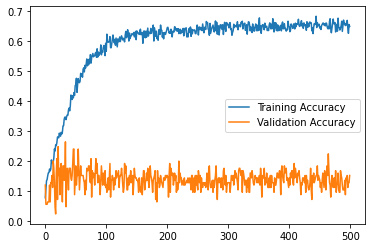

In [40]:
plt.figure()
plt.plot([i for i in range(nb_epochs)],fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot([i for i in range(nb_epochs)],fitted_model.history['val_accuracy'], label = "Validation Accuracy")
plt.legend()

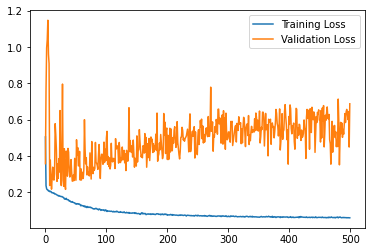

In [41]:
plt.figure()
plt.plot([i for i in range(nb_epochs)],fitted_model.history['loss'], label = "Training Loss")
plt.plot([i for i in range(nb_epochs)],fitted_model.history['val_loss'], label = "Validation Loss")
plt.legend()

In [42]:
def pred(image_path):
    image = Image.open(image_path)
    image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
    x = np.array(image)
    x = np.expand_dims(x,axis=0)
    c = np.argmax(model.predict(x), axis=1)
    l = os.listdir(DATASET_PATH + '/train')
    l.sort()
    return l[c[0]]


pred(DATASET_PATH + '/train/Bug/accelgor.png')

'Bug'